<a href="https://colab.research.google.com/github/Akankhya123/Sentiment-Analysis-of-Amazon-reviews/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Loading of the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['Amazon_Unlocked_Mobile.csv']))

Saving Amazon_Unlocked_Mobile.csv to Amazon_Unlocked_Mobile (2).csv


Data Analysis

In [ ]:
print("Summary statistics of numerical features\n",df.describe())
print("Total number of reviews \n", len(df))
print("Total number of brands\n", len(list(set(df['Brand Name']))))
print("\nTotal number of unique products: ", len(list(set(df['Product Name']))))
print("Percentage of reviews with neutral sentiment{:.2f}%".format(df[df['Rating']==3]['Reviews'].count()/len(df)*100))
print("Percentage of reviews with positive sentiment {:.2f}%".format(df[df['Rating']>3]['Reviews'].count()/len(df)*100))
print("Percentage of reviews with negative sentiment {:.2f}%".format(df[df['Rating']<3]['Reviews'].count()/len(df)*100))


Summary statistics of numerical features
                Price         Rating   Review Votes
count  407907.000000  413840.000000  401544.000000
mean      226.867155       3.819578       1.507237
std       273.006259       1.548216       9.163853
min         1.730000       1.000000       0.000000
25%        79.990000       3.000000       0.000000
50%       144.710000       5.000000       0.000000
75%       269.990000       5.000000       1.000000
max      2598.000000       5.000000     645.000000
Total number of reviews 
 413840
Total number of brands
 385

Total number of unique products:  4410
Percentage of reviews with neutral sentiment7.68%
Percentage of reviews with positive sentiment 68.86%
Percentage of reviews with negative sentiment 23.45%


Data Visualization

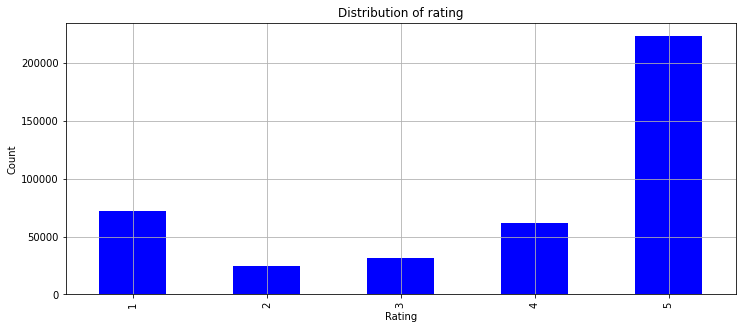

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Distribution of rating')
df['Rating'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()


From the above bar graph the reviews with rating 5 are the highest , followed by 1, 4, 3 and 2.



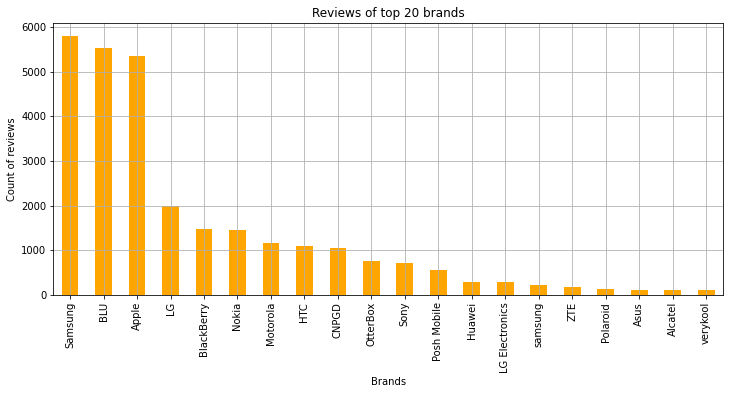

In [ ]:
#Displaying reviews of top 20 brands
plt.figure(figsize=(12,5))
plt.title('Reviews of top 20 brands')
plt.xlabel('Brands')
plt.ylabel('Count of reviews')
brands = df['Brand Name'].value_counts()
brands[:20].plot(kind='bar', color='orange')
plt.grid()

From the above bar plot graph it is found that Samsung brand has the highest number of reviews, followed by BLU, Apple and so on.

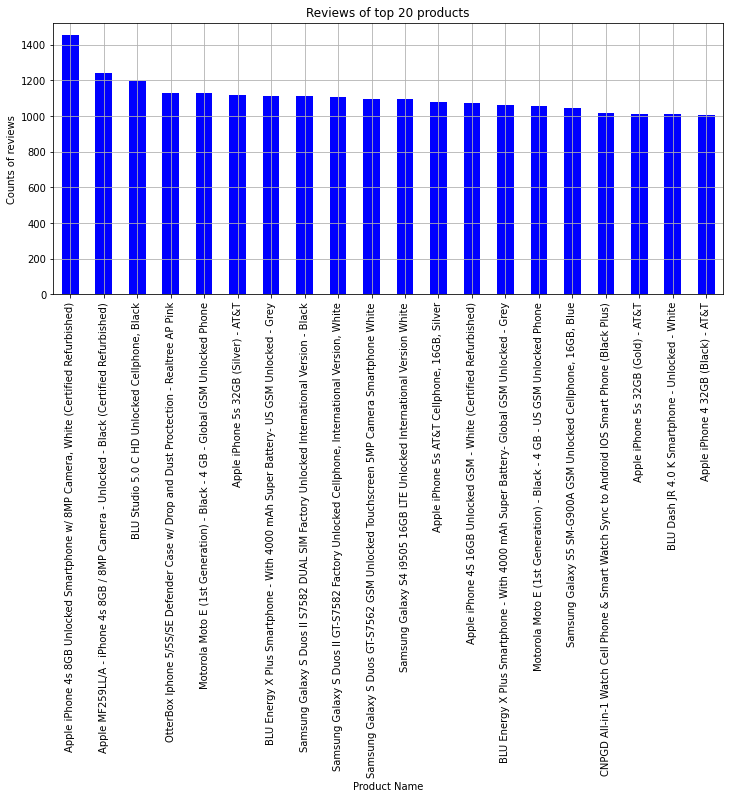

In [ ]:
#Visualizing number of reviews for top 20 products
plt.figure(figsize=(12,5))
products = df['Product Name'].value_counts()
products[:20].plot(kind='bar', color='blue')
plt.title('Reviews of top 20 products')
plt.xlabel('Product Name')
plt.ylabel('Counts of reviews')
plt.grid()

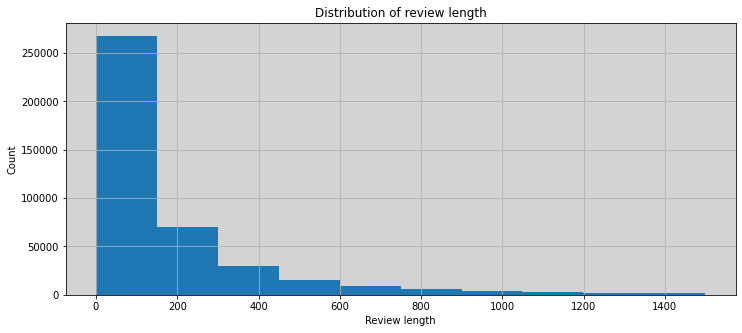

In [ ]:
#Visualizing distribution of review length
plt.figure(figsize=(12,5))
review_length = df['Reviews'].dropna().map(lambda x : len(x))
review_length.loc[review_length < 1500].hist() 
plt.title('Distribution of review length')
plt.xlabel('Review length')
plt.ylabel('Count')
ax = plt.axes()
ax.set_facecolor('lightgrey')



Data Preparation

In [ ]:
#Sampling(taking 10% of the dataset)
df =df.sample(frac=0.1, random_state =0)
#Dropping of the null values
df.dropna(inplace=True) 
#Removing all the neutral ratings i.e Rating=3
df = df[df['Rating']!=3]
#Encoding reviews with rating > 3 as positive sentiment and rating < 3 as negative sentiment
df['Sentiment'] = np.where(df['Rating']>3, 1, 0)
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
134801,BLU Studio 5.0 C HD - Unlocked Cell Phones - R...,BLU,2000.00,5,"For the price I paid for this devices, its fan...",0.0,1
123493,Blu LIFE 8 Unlocked (Pink),BLU,199.98,5,love love love it....good buy...recommend to a...,0.0,1
335592,Samsung Galaxy S Duos II S7582 DUAL SIM Factor...,Samsung,299.99,4,Good,0.0,1
246353,"Motorola Droid 2 A955 Verizon Phone 5MP Cam, W...",Motorola,82.00,1,Not good. Returned first phone and they sent m...,0.0,0
273324,Nokia Lumia 920 32GB Unlocked GSM 4G LTE Windo...,Nokia,149.35,4,Met expectations! I'm very satisfied!Even arri...,1.0,1
...,...,...,...,...,...,...,...
336011,Samsung Galaxy S Duos II S7582 DUAL SIM Factor...,Samsung,299.99,4,excellent,0.0,1
154541,BLU Studio Selfie - Smartphone - GSM Unlocked ...,BLU,2000.00,2,Served its purpose but the camera is terrible!,0.0,0
397667,Sony Xperia Z5 Compact E5823 2GB/32GB 23MP 4.6...,Sony,429.89,5,The best cellphone ever.,0.0,1
88025,BlackBerry Bold 9700 Unlocked GSM 3G World Pho...,BlackBerry,101.99,4,This is an excellent phone for a blackberry. U...,1.0,1


Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Sentiment'],test_size=0.1, random_state= 0)
print("Loading %d training examples and %d validation examples"%(X_train.shape[0],X_test.shape[0]))
X_train, y_train


Loading 27799 training examples and 3089 validation examples


(217080                                          Works well!
 95784     Could'nt activate it because it was reported t...
 96863     We bought this phone in 2013 to use full time ...
 304566            Works like a new one and very affordable!
 322836    I love this phone. You can't even tell that it...
                                 ...                        
 348539                                       Nice and great
 29467     Awesome stuff. Phone is great condition. Fast ...
 13765     hard to fit certain cables and chargers into t...
 378276    Bought this phone when my HTC Incredible died....
 34817     Excellent, thanks for the phone .. it's in top...
 Name: Reviews, Length: 27799, dtype: object, 217080    1
 95784     0
 96863     1
 304566    1
 322836    1
          ..
 348539    1
 29467     1
 13765     1
 378276    1
 34817     1
 Name: Sentiment, Length: 27799, dtype: int64)

Text Precprocessing

1.   Step 1 : Removal of html tags using Beautiful Soup
2.   Step 2 : Removal of non-character such as digits and symbols
3.   Step 3 : Converting to lower case
4.   Step 4 : Removal of stop words
5.   Step 5 : Converting root words to stem 








In [ ]:
def cleantext(raw_text, remove_stopwords=True, stemming=True,split_text=False  ):
  '''Converting a raw review to clean review '''
  text = BeautifulSoup(raw_text, 'html.parser').get_text()
  letters_only = re.sub("[^'a-zA-Z']", " ", text)
  words = letters_only.lower().split()
  if remove_stopwords:
   stop_words = set(stopwords.words('english'))
   words = [w for w in words if not w in stop_words]

  if stemming==True :
   stemmer =SnowballStemmer('english')
   stem_words = [stemmer.stem(w) for w in words]
  if split_text == True:
   return(words)

  return (" ".join(words))


In [ ]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from nltk import sent_tokenize, word_tokenize, pos_tag
from bs4 import BeautifulSoup
import logging

X_train_cleaned = []
X_test_cleaned = []
for x in X_train:
  X_train_cleaned.append(cleantext(x))
for x in X_test:
  X_test_cleaned.append(cleantext(x))
print("Cleaned review of train_X[ 10 ] is ", X_train_cleaned[ 10 ])
print("Size of X_train_cleaned data: ", len(X_train_cleaned))

Cleaned review of train_X[ 10 ] is  good product fast shipping thank
Size of X_train_cleaned data:  27799


In [ ]:
X_train_cleaned

['works well',
 "could'nt activate reported sprint lost stolen phone",
 "bought phone use full time mexico telcel sim card price newest technology phone great many fine features anticipated arrived time indeed unlocked worked properly immediately upon insertion sim crummy old phone we'll spend extra dollars buy extra memory need yet wow good concept",
 'works like new one affordable',
 "love phone can't even tell refurbished works well ton cool features",
 'quite happy brand new iphone',
 'good phone price im happy',
 'love',
 'give phone came original box original headphones charger perfectly unlocked ready used skeptical buy phone since one review said let give chance see proved phone said phone birthday gift son love face kid open gift want thank would buy',
 "pros camera screen batterycons bad power button ergonomics accidentally press times day important button everyday use moved somewhere easy press bad power button ergonomics accidentally pressed pocket seconds phone reboot real

CountVectorizer with Multinomial Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
count_vect = CountVectorizer()
X_train_countVect = count_vect.fit_transform(X_train_cleaned)
print(count_vect.vocabulary_)
#X_train_countvect = count_vect.fit_transform(X_train_cleaned)
print("Features present", count_vect.get_feature_names())
print("Number of features present:", len(count_vect.get_feature_names()))

{'works': 19225, 'well': 18942, 'could': 3793, 'nt': 11466, 'activate': 203, 'reported': 14280, 'sprint': 16183, 'lost': 10006, 'stolen': 16369, 'phone': 12430, 'bought': 2029, 'use': 18328, 'full': 7033, 'time': 17388, 'mexico': 10567, 'telcel': 17027, 'sim': 15541, 'card': 2538, 'price': 13050, 'newest': 11261, 'technology': 16997, 'great': 7568, 'many': 10263, 'fine': 6574, 'features': 6447, 'anticipated': 813, 'arrived': 1037, 'indeed': 8613, 'unlocked': 18123, 'worked': 19207, 'properly': 13282, 'immediately': 8448, 'upon': 18275, 'insertion': 8772, 'crummy': 3971, 'old': 11639, 'we': 18879, 'll': 9874, 'spend': 16115, 'extra': 6229, 'dollars': 5062, 'buy': 2336, 'memory': 10465, 'need': 11174, 'yet': 19404, 'wow': 19271, 'good': 7424, 'concept': 3384, 'like': 9782, 'new': 11254, 'one': 11662, 'affordable': 409, 'love': 10023, 'can': 2472, 'even': 5911, 'tell': 17047, 'refurbished': 14045, 'ton': 17498, 'cool': 3687, 'quite': 13599, 'happy': 7839, 'brand': 2079, 'iphone': 8990, 'i

In [ ]:
#Train Multinomial NB classifier
mnb = MultinomialNB()

mnb.fit(X_train_countVect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
print(X_train_countvect.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:

pickle.dump(count_vect,open('countVect.pkl','wb'))

In [ ]:

def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
predictions = mnb.predict(count_vect.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.9129

AUC score : 0.8638

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.76      0.82       778
           1       0.92      0.96      0.94      2311

    accuracy                           0.91      3089
   macro avg       0.90      0.86      0.88      3089
weighted avg       0.91      0.91      0.91      3089


Confusion Matrix : 
 [[ 595  183]
 [  86 2225]]


TfidfVectorizer with Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print(tfidf.vocabulary_)
print(tfidf.idf_)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

{'works': 5899, 'well': 5810, 'could': 1299, 'nt': 3550, 'activate': 262, 'it': 2816, 'because': 647, 'was': 5772, 'reported': 4360, 'to': 5379, 'sprint': 4983, 'as': 502, 'lost': 3112, 'or': 3638, 'stolen': 5043, 'phone': 3827, 'we': 5792, 'bought': 779, 'this': 5321, 'in': 2676, '2013': 64, 'use': 5635, 'full': 2221, 'time': 5360, 'mexico': 3287, 'with': 5874, 'telcel': 5249, 'sim': 4779, 'card': 935, 'for': 2152, 'the': 5296, 'price': 3994, 'of': 3577, 'now': 3547, 'not': 3520, 'newest': 3479, 'technology': 5241, 'great': 2380, 'and': 409, 'has': 2464, 'many': 3196, 'more': 3371, 'fine': 2075, 'features': 2034, 'than': 5288, 'anticipated': 433, 'arrived': 495, 'on': 3599, 'is': 2808, 'indeed': 2705, 'unlocked': 5576, 'worked': 5894, 'properly': 4067, 'immediately': 2657, 'upon': 5615, 'insertion': 2740, 'from': 2208, 'our': 3668, 'old': 3595, 'll': 3065, 'spend': 4964, 'few': 2050, 'extra': 1967, 'dollars': 1634, 'buy': 878, 'memory': 3261, 'doesn': 1628, 'need': 3454, 'yet': 5950, 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.9132

AUC score : 0.8469

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.71      0.81       778
           1       0.91      0.98      0.94      2311

    accuracy                           0.91      3089
   macro avg       0.92      0.85      0.87      3089
weighted avg       0.91      0.91      0.91      3089


Confusion Matrix : 
 [[ 555  223]
 [  45 2266]]


Applying GridSearchCV

In [ ]:

from sklearn.model_selection import  GridSearchCV
from sklearn.pipeline import Pipeline
estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)


params = {"lr__C":[0.1, 1, 10], 
          "tfidf__min_df": [1, 3], 
          "tfidf__max_features": [1000, None], 
          "tfidf__ngram_range": [(1,1), (1,2)], 
          "tfidf__stop_words": [None, "english"]} 

grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_cleaned, y_train)
print("The best parameter set is : \n", grid.best_params_)


# Evaluate on the validaton set
predictions = grid.predict(X_test_cleaned)
modelEvaluation(predictions)

The best parameter set is : 
 {'lr__C': 10, 'tfidf__max_features': None, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}

Accuracy on validation set: 0.9476

AUC score : 0.9240

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       778
           1       0.96      0.97      0.97      2311

    accuracy                           0.95      3089
   macro avg       0.94      0.92      0.93      3089
weighted avg       0.95      0.95      0.95      3089


Confusion Matrix : 
 [[ 682   96]
 [  66 2245]]


Word Cloud

In [ ]:
Positive_sentiment = df[df['Sentiment']==1]
Negative_sentiment = df[df['Sentiment']==0]


In [ ]:
Positive_sentiment[:5]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
134801,BLU Studio 5.0 C HD - Unlocked Cell Phones - R...,BLU,2000.00,5,"For the price I paid for this devices, its fan...",0.0,1
123493,Blu LIFE 8 Unlocked (Pink),BLU,199.98,5,love love love it....good buy...recommend to a...,0.0,1
335592,Samsung Galaxy S Duos II S7582 DUAL SIM Factor...,Samsung,299.99,4,Good,0.0,1
273324,Nokia Lumia 920 32GB Unlocked GSM 4G LTE Windo...,Nokia,149.35,4,Met expectations! I'm very satisfied!Even arri...,1.0,1
24946,Apple iPhone 5c 16GB (Pink) - AT&T,Apple,519.00,5,I was worried because it was used but seller g...,1.0,1


In [ ]:
Negative_sentiment[:5]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
246353,"Motorola Droid 2 A955 Verizon Phone 5MP Cam, W...",Motorola,82.00,1,Not good. Returned first phone and they sent m...,0.0,0
247672,Motorola Droid RAZR 4G LTE Android Smartphone ...,Motorola,159.00,2,"Pooor quality, it seemed like it was broken be...",0.0,0
44979,Apple iPhone 5s 32GB (Silver) - AT&T,Apple,43.95,1,PLEASE BE CAREFUL BUYING THIS PHONE. I read a ...,2.0,0
395724,"Sony Xperia Z3 D6653 GSM Cellphone Unlocked, I...",Sony,279.95,1,"It is sucks product, one month they used they ...",1.0,0
291760,PHONE VERIZON HTC ANDROID ERIS 1.5 OS; GOOGLE ...,HTC,15.55,1,I did not receive the correct phone. I ordered...,0.0,0


In [ ]:
Positive_sentiment= df['Brand Name']
Positive_sentiment

134801           BLU
123493           BLU
335592       Samsung
246353      Motorola
273324         Nokia
             ...    
336011       Samsung
154541           BLU
397667          Sony
88025     BlackBerry
392362          Sony
Name: Brand Name, Length: 30888, dtype: object

In [ ]:
Negative_sentiment=df['Brand Name']
Negative_sentiment

134801           BLU
123493           BLU
335592       Samsung
246353      Motorola
273324         Nokia
             ...    
336011       Samsung
154541           BLU
397667          Sony
88025     BlackBerry
392362          Sony
Name: Brand Name, Length: 30888, dtype: object

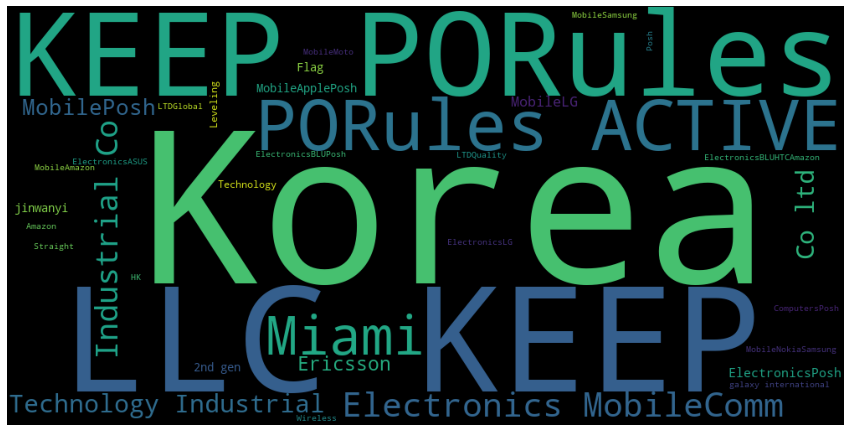

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud=WordCloud(width=1000, height=500).generate("".join(Positive_sentiment))
plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
plt.close()

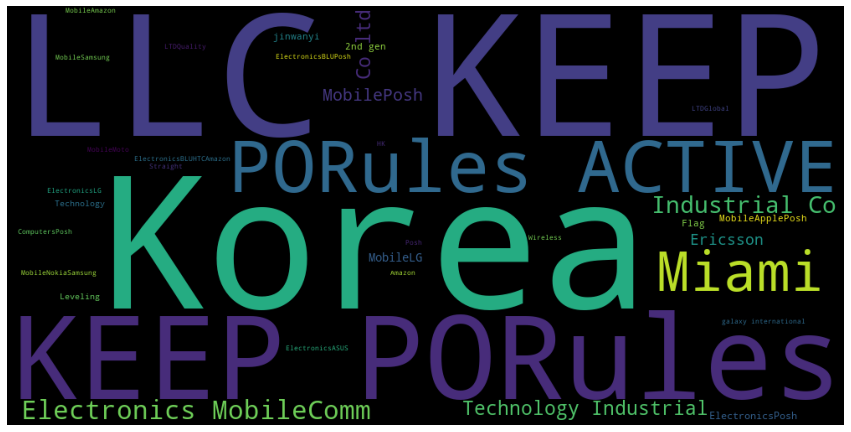

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud=WordCloud(width=1000, height=500).generate("".join(Negative_sentiment))
plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
plt.close()